In [1]:
%cd ..

/home/tianshu/prediction


In [2]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
from tqdm.notebook import tqdm

from forecast import Dataset, Method

In [3]:
ds = Dataset("data/data.npz", if_data="data/if.npz", offset=1000. * 1000.)

with open("results/manifest.json") as f:
    methods = json.load(f)
    
results = {
    method: Method("results/{}".format(method), ds, desc)
    for method, desc in tqdm(methods.items())
}

  0%|          | 0/27 [00:00<?, ?it/s]

In [21]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def tsne(result):

    fig, axs = plt.subplots(1, 1, figsize=(16, 12))

    data = np.load(result.path)["M"][0, 0]    
    scaled = StandardScaler().fit_transform(data)
    xy = TSNE(
        n_components=2, random_state=0, perplexity=50,
        n_jobs=6).fit_transform(scaled)
    axs.scatter(xy[:, 0], xy[:, 1])

    texts = [
        axs.text(x, y, label.split('/')[-1])
        for (x, y), label in zip(xy, ds.modules)]
    adjust_text(texts)

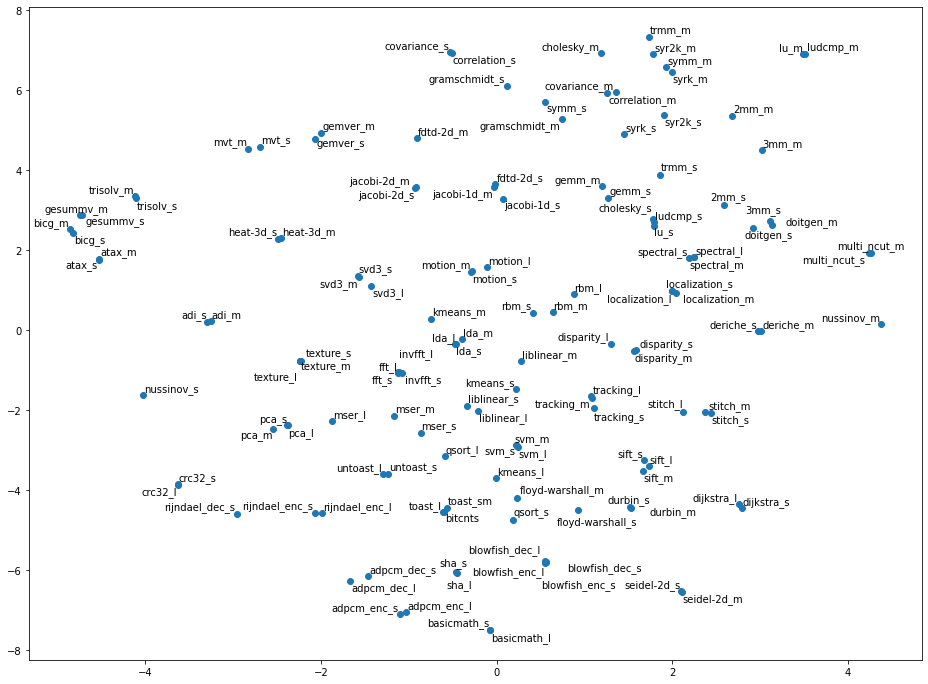

In [22]:
tsne(results["embedding"].results[-1])

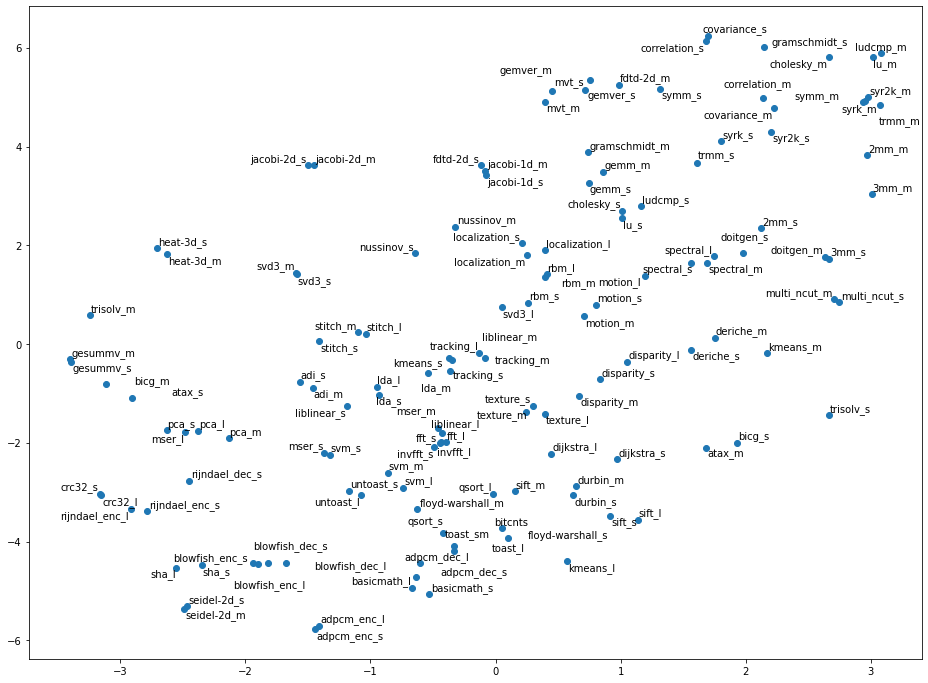

In [24]:
tsne(results["Lr64"].results[-1])